# Continental scale

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# === Load and prepare the data ===
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df_duration.csv')
df.drop(['Num', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude'], axis=1, inplace=True)

# === Define common feature set ===
features = df.drop([
    'vegetation_duration', 'vegetation_area_ratio'], axis=1)

In [2]:
# ========================
# 1. Model for vegetation_duration
# ========================
X_dur = features.copy()
y_dur = df['vegetation_duration']
X_train_dur, X_test_dur, y_train_dur, y_test_dur = train_test_split(X_dur, y_dur, test_size=0.2, random_state=42)

model_dur = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
model_dur.fit(X_train_dur, y_train_dur)
y_pred_dur = model_dur.predict(X_test_dur)
r2_dur = r2_score(y_test_dur, y_pred_dur)

# ========================
# 2. Model for vegetation_area_ratio
# ========================
X_area = features.copy()
y_area = df['vegetation_area_ratio']
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y_area, test_size=0.2, random_state=42)

model_area = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
model_area.fit(X_train_area, y_train_area)
y_pred_area = model_area.predict(X_test_area)
r2_area = r2_score(y_test_area, y_pred_area)

C:\Users\hyou34\AppData\Local\Temp\ipykernel_27984\1300508214.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


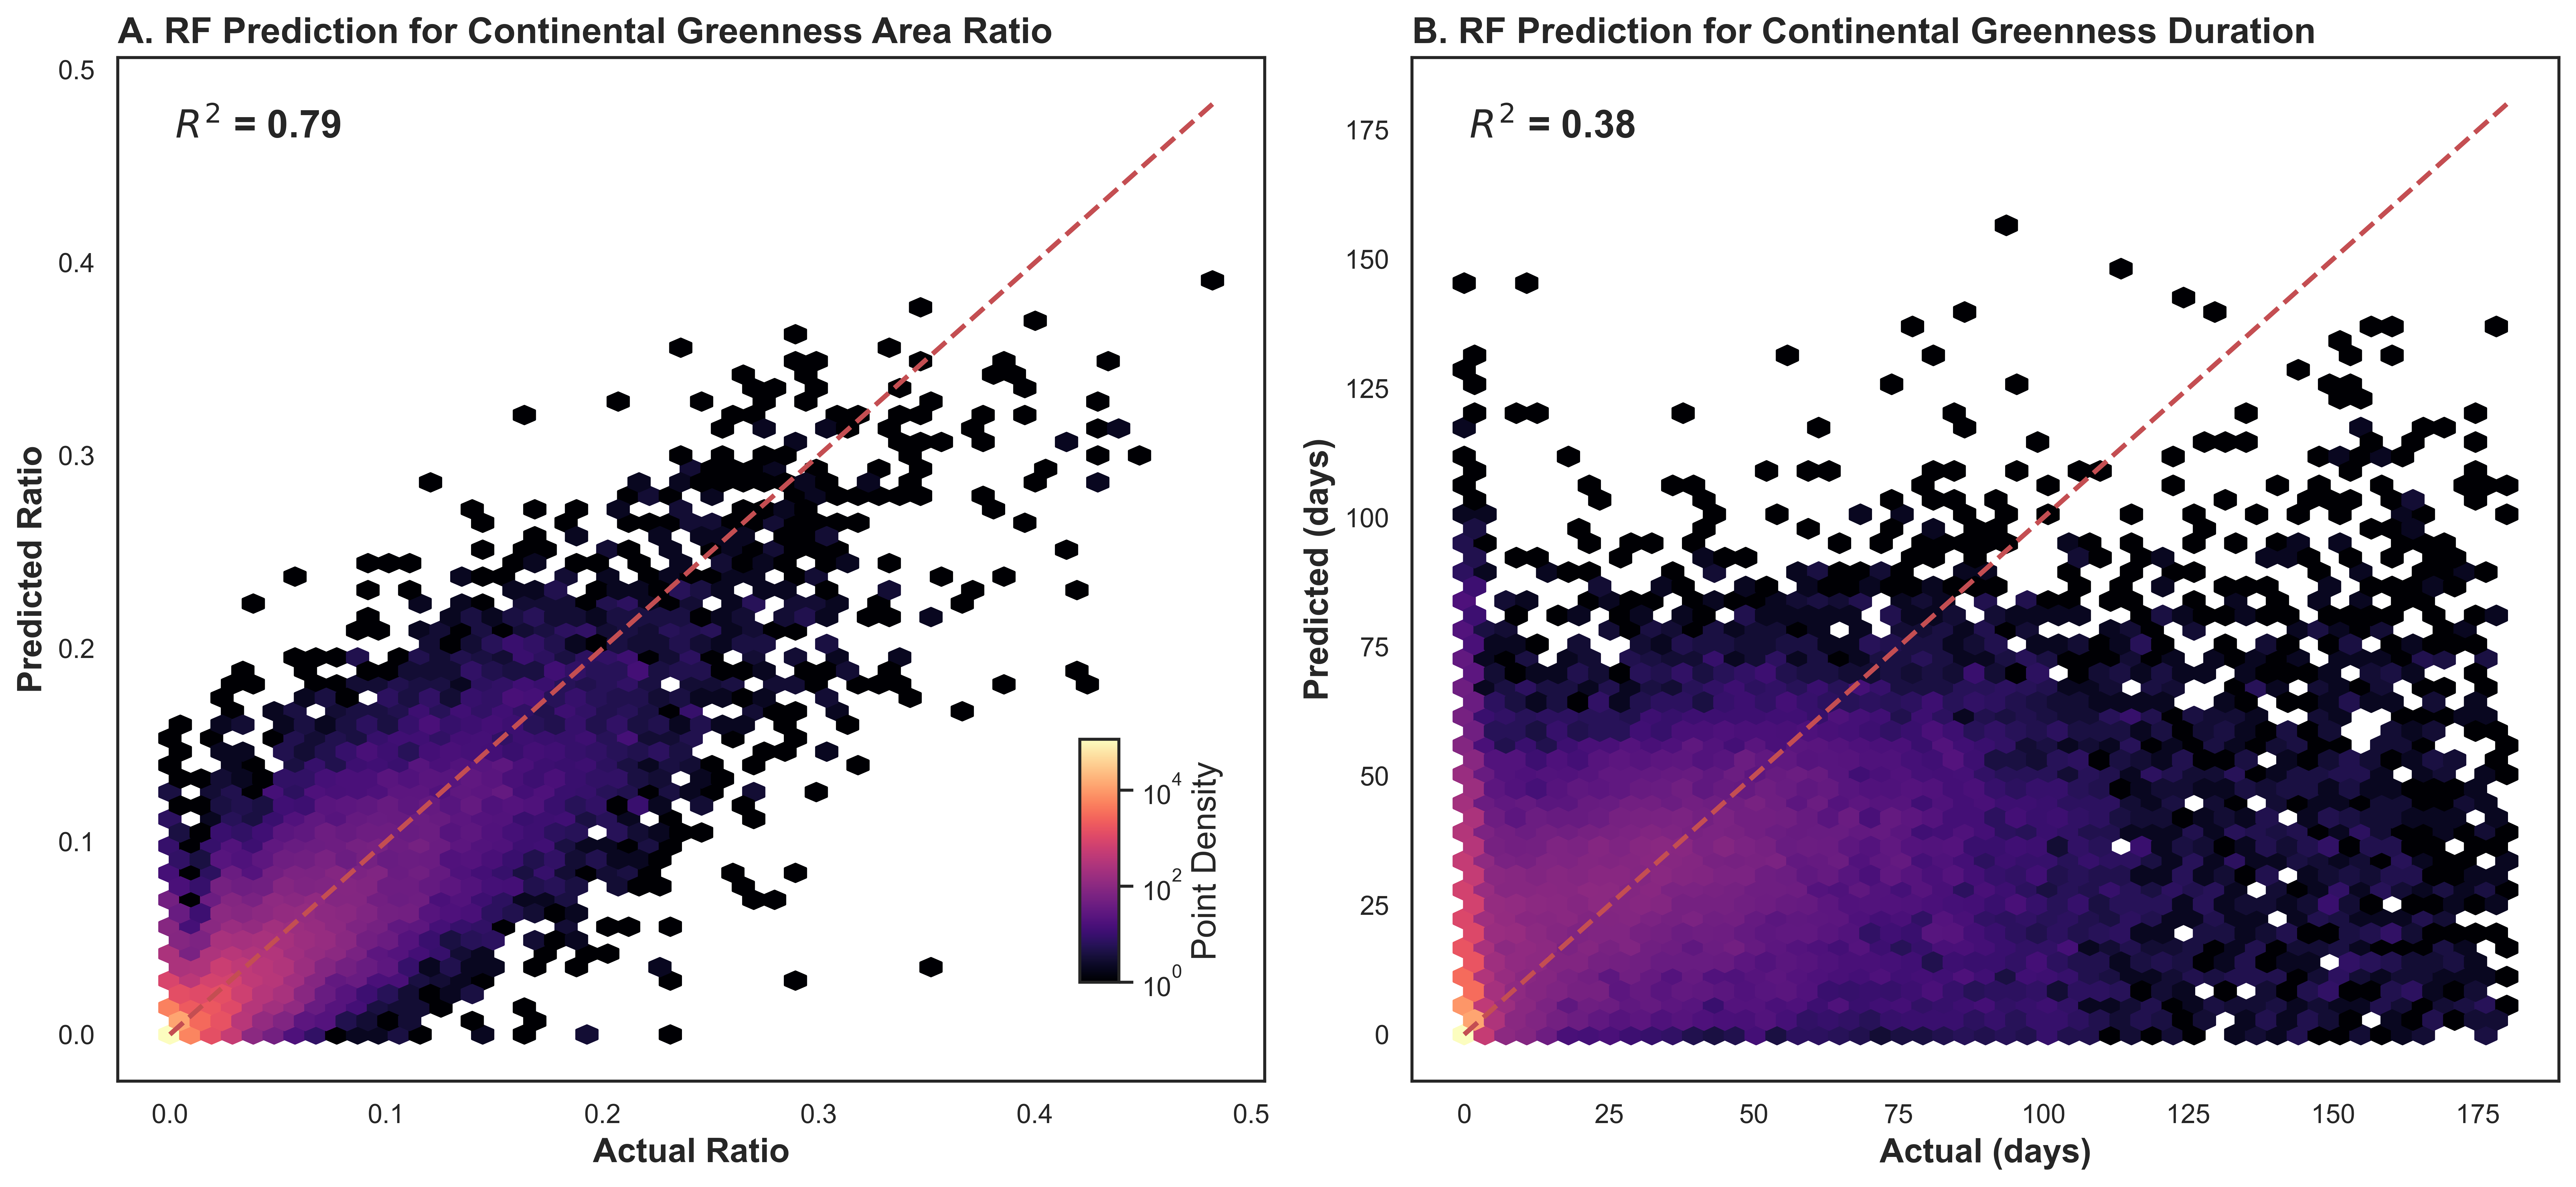

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Set style ===
sns.set(style="white")

# === Create subplots ===
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=False, sharey=False, dpi=600)

# === A. Area Ratio ===
x_area = y_test_area
y_area = y_pred_area
hb1 = axes[0].hexbin(x_area, y_area, gridsize=50, cmap='magma', bins='log')
axes[0].plot([x_area.min(), x_area.max()], [x_area.min(), x_area.max()], 'r--', linewidth=2)
axes[0].set_title("A. RF Prediction for Continental Greenness Area Ratio", fontsize=15, fontweight='bold', loc='left')
axes[0].set_xlabel("Actual Ratio", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Predicted Ratio", fontsize=14, fontweight='bold')
axes[0].text(0.05, 0.95, f"$R^2$ = {r2_area:.2f}", transform=axes[0].transAxes,
             verticalalignment='top', fontsize=16, bbox=dict(facecolor='white', alpha=0.6), fontweight='bold')
axes[0].grid(False)

# === B. Duration ===
x_dur = y_test_dur
y_dur = y_pred_dur
hb2 = axes[1].hexbin(x_dur, y_dur, gridsize=50, cmap='magma', bins='log')
axes[1].plot([x_dur.min(), x_dur.max()], [x_dur.min(), x_dur.max()], 'r--', linewidth=2)
axes[1].set_title("B. RF Prediction for Continental Greenness Duration", fontsize=15, fontweight='bold', loc='left')
axes[1].set_xlabel("Actual (days)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Predicted (days)", fontsize=14, fontweight='bold')
axes[1].text(0.05, 0.95, f"$R^2$ = {r2_dur:.2f}", transform=axes[1].transAxes,
             verticalalignment='top', fontsize=16, bbox=dict(facecolor='white', alpha=0.6), fontweight='bold')
axes[1].grid(False)

# === Shared colorbar ===
# === Add smaller colorbar manually inside the first subplot ===
# [left, bottom, width, height] in figure coordinates (0–1)
cax = fig.add_axes([0.42, 0.18, 0.015, 0.2])  # adjust position as needed
cb = fig.colorbar(hb1, cax=cax)
cb.set_label("Point Density", fontsize=14)

# === Final layout ===
plt.tight_layout()
output_path = r"G:\Hangkai\Antarctica_Mapping_Data\RF_continental_prediction.png"
plt.savefig(output_path, dpi=600, bbox_inches='tight')
plt.show()

# Area Ratio